# ***PROBLAM  STATEMENT***

- *The goal of this project is to create a predictive model that assesses vehicle maintenance needs and engine health. Using historical maintenance data and engine performance metrics, the model will predict whether a vehicle requires maintenance and whether the engine is in a healthy condition.many people can’t find out what happens when a vehicle is breakdown .this project will give an accurate statement of what happen to the vehicle*


# ***Objectives***

-  *Develop a model to predict vehicle maintenance needs based on mileage, condition, and service history.*
- *Create an engine health classifier using engine sensor data (e.g., RPM, oil pressure, temperature).*
- *Implement data preprocessing techniques to handle categorical and numerical data.*
- *Evaluate model performance using suitable metrics (e.g., accuracy, precision,
recall)*.

# ***TARGET VARIABLE***

- *engine_condition : The engine_condition column represents the overall health status of a vehicle’s engine. This helps in predicting whether the engine is in good, average, or poor condition based on multiple factors*.

# GOALS

- *The goal of this project is to develop an AI-powered predictive system that analyzes vehicle and engine data to*
- *Determine whether an engine is in Good, Average, or Poor condition using machine learning*








## ***LOAD AND MERGE THE DATASET***

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# prompt: eda cleaning method use this data

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Handle missing values (replace with mean, median, or mode based on the context)
# Example: Replace missing values in 'mileage' with the meanimport pandas as pd
import zipfile

# File paths (update these if needed)
engine_data_path = "/content/engine_data.csv.zip"
vehicle_maintenance_path = "/content/vehicle_maintenance_data.csv.zip"

# Extract files
with zipfile.ZipFile(engine_data_path, "r") as zip_ref:
    zip_ref.extractall("/content/")
with zipfile.ZipFile(vehicle_maintenance_path, "r") as zip_ref:
    zip_ref.extractall("/content/")

# Load the datasets
engine_df = pd.read_csv("/content/engine_data.csv")
vehicle_maintenance_df = pd.read_csv("/content/vehicle_maintenance_data.csv")

# Standardize column names
engine_df.columns = engine_df.columns.str.lower().str.replace(" ", "_")
vehicle_maintenance_df.columns = vehicle_maintenance_df.columns.str.lower().str.replace(" ", "_")

# Add an index column to both datasets for merging
engine_df["index"] = engine_df.index
vehicle_maintenance_df["index"] = vehicle_maintenance_df.index

# Merge datasets on the artificial index
merged_df = pd.merge(engine_df, vehicle_maintenance_df, on="index", how="inner")

# Drop the index column after merging
merged_df.drop(columns=["index"], inplace=True)

# Save the merged dataset
merged_df.to_csv("/content/Vehicle maintenance and engine health.csv", index=False)
merged_df.head()

,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,vehicle_model,mileage,maintenance_history,...,warranty_expiry_date,owner_type,insurance_premium,service_history,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,Truck,58765,Good,...,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,Van,60353,Average,...,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,Bus,68072,Poor,...,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,Bus,60849,Average,...,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,Bus,45742,Poor,...,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1


# ***DATA visualization***

<ipython-input-32-31df93fb63ce>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='need_maintenance', data= merged_df, palette='coolwarm')


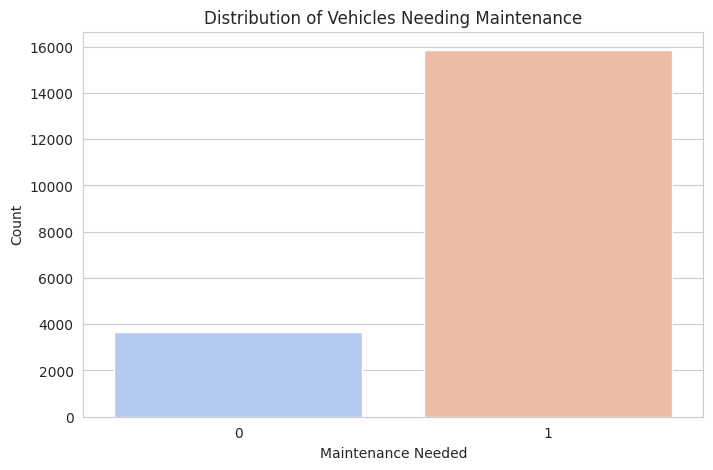

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.countplot(x='need_maintenance', data= merged_df, palette='coolwarm')
plt.title("Distribution of Vehicles Needing Maintenance")
plt.xlabel("Maintenance Needed")
plt.ylabel("Count")

plt.show()


<ipython-input-33-81ad8dce2271>:4: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(x='need_maintenance', data= merged_df, palette='blue')


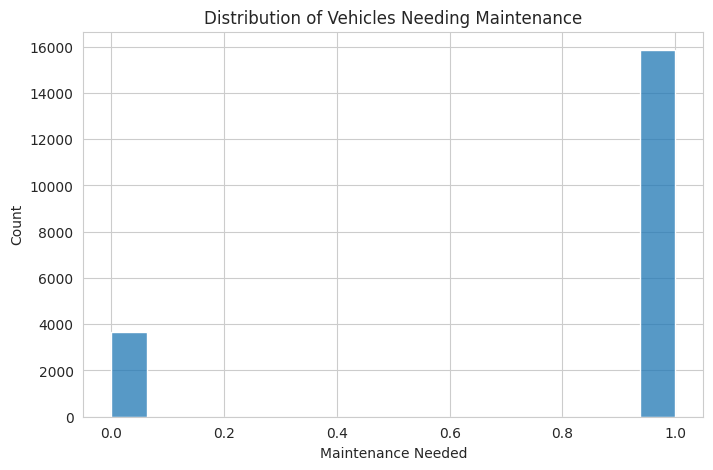

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize=(8, 5))

sns.histplot(x='need_maintenance', data= merged_df, palette='blue')
plt.title("Distribution of Vehicles Needing Maintenance")
plt.xlabel("Maintenance Needed")
plt.ylabel("Count")

plt.show()

 # ***DATA CLEANING***

In [ ]:
import pandas as pd

# Check for missing values before cleaning
print("Missing Values Before Cleaning:\n", merged_df.isnull().sum())

# Convert date columns to datetime (if they exist)
for col in ["last_service_date", "warranty_expiry_date"]:
    if col in merged_df.columns:
        merged_df[col] = pd.to_datetime(merged_df[col], errors="coerce")

# Fill missing values
merged_df.fillna({
    **{col: merged_df[col].median() for col in merged_df.select_dtypes(include=['number']).columns},  # Fill numeric with median
    **{col: merged_df[col].mode()[0] if not merged_df[col].mode().empty else "Unknown" for col in merged_df.select_dtypes(include=['object']).columns}  # Fill categorical with mode
}, inplace=True)

# Create time-based features (only if date columns exist)
if "last_service_date" in merged_df and "warranty_expiry_date" in merged_df:
    merged_df["days_since_last_service"] = (pd.Timestamp.today() - merged_df["last_service_date"]).dt.days.fillna(0)
    merged_df["warranty_remaining_days"] = (merged_df["warranty_expiry_date"] - pd.Timestamp.today()).dt.days.fillna(0)
    merged_df.drop(columns=["last_service_date", "warranty_expiry_date"], inplace=True)

# Check for missing values after cleaning
print("\nMissing Values After Cleaning:\n", merged_df.isnull().sum())

# Show first few rows of cleaned data
print("\nCleaned Dataset Sample:\n", merged_df.head())


Missing Values Before Cleaning:
 engine_rpm              0
lub_oil_pressure        0
fuel_pressure           0
coolant_pressure        0
lub_oil_temp            0
coolant_temp            0
engine_condition        0
vehicle_model           0
mileage                 0
maintenance_history     0
reported_issues         0
vehicle_age             0
fuel_type               0
transmission_type       0
engine_size             0
odometer_reading        0
last_service_date       0
warranty_expiry_date    0
owner_type              0
insurance_premium       0
service_history         0
accident_history        0
fuel_efficiency         0
tire_condition          0
brake_condition         0
battery_status          0
need_maintenance        0
dtype: int64

Missing Values After Cleaning:
 engine_rpm                 0
lub_oil_pressure           0
fuel_pressure              0
coolant_pressure           0
lub_oil_temp               0
coolant_temp               0
engine_condition           0
vehicle_model   

# ***Feature Engineering***

In [ ]:
# Feature: Wear and Tear Index
merged_df["wear_tear_index"] = merged_df["mileage"] * (merged_df["accident_history"] + merged_df["service_history"])

# Feature: Engine Stress Level
merged_df["engine_stress_level"] = merged_df["lub_oil_pressure"] * merged_df["coolant_temp"] * merged_df["engine_rpm"]

# Display the DataFrame with the new features
merged_df.head()


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,vehicle_model,mileage,maintenance_history,...,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance,days_since_last_service,warranty_remaining_days,wear_tear_index,engine_stress_level
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,Truck,58765,Good,...,3,13.622204,New,New,Weak,1,499,79,528885,142490.146811
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,Van,60353,Average,...,0,13.625307,New,New,Weak,1,562,59,422471,212450.001057
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,Bus,68072,Poor,...,0,14.306302,New,Good,Weak,1,648,21,476504,122663.074008
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,Bus,60849,Average,...,3,18.709467,New,Worn Out,New,1,590,213,608490,125878.762489
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,Bus,45742,Poor,...,2,16.977482,Good,Good,Weak,1,681,161,365936,305504.475934


# ***Encode Categorical Variables***

In [ ]:
from sklearn.preprocessing import LabelEncoder

for  col in merged_df.select_dtypes(include=['object']).columns:
    merged_df[col] = LabelEncoder().fit_transform(merged_df[col])

merged_df.head()


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,vehicle_model,mileage,maintenance_history,...,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance,days_since_last_service,warranty_remaining_days,wear_tear_index,engine_stress_level
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,4,58765,1,...,3,13.622204,1,1,2,1,499,79,528885,142490.146811
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,5,60353,0,...,0,13.625307,1,1,2,1,562,59,422471,212450.001057
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0,68072,2,...,0,14.306302,1,0,2,1,648,21,476504,122663.074008
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0,60849,0,...,3,18.709467,1,2,1,1,590,213,608490,125878.762489
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0,45742,2,...,2,16.977482,0,0,2,1,681,161,365936,305504.475934


# ***correlation***

In [ ]:
# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(merged_df.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

ValueError: could not convert string to float: 'Truck'

<Figure size 800x600 with 0 Axes>

# ***Normalize & Standardize Numerical Features***

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

# Normalize (0-1 scaling) for numerical features
scaler = MinMaxScaler()
merged_df[["mileage", "fuel_efficiency"]] = scaler.fit_transform(merged_df[["mileage", "fuel_efficiency"]])

# Standardizing specific features
std_scaler = StandardScaler()
merged_df[["mileage", "fuel_efficiency"]] = std_scaler.fit_transform(merged_df[["mileage", "fuel_efficiency"]])

merged_df.head()


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,vehicle_model,mileage,maintenance_history,...,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance,days_since_last_service,warranty_remaining_days,wear_tear_index,engine_stress_level
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,4,0.251998,1,...,3,-0.467152,1,1,2,1,499,79,528885,142490.146811
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,5,0.362233,0,...,0,-0.466076,1,1,2,1,562,59,422471,212450.001057
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,0,0.898066,2,...,0,-0.229761,1,0,2,1,648,21,476504,122663.074008
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,0,0.396664,0,...,3,1.298200,1,2,1,1,590,213,608490,125878.762489
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,0,-0.652026,2,...,2,0.697177,0,0,2,1,681,161,365936,305504.475934


# ***Define Target and Features***

In [ ]:
from sklearn.model_selection import train_test_split

#  Define Features (X) and Target (y)
X = merged_df.drop(columns=["need_maintenance"])  # Features
y = merged_df["need_maintenance"]  # Target

#  Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Print dataset shapes to verify
print("Training Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)


Training Data Shape: (15628, 28)
Testing Data Shape: (3907, 28)


# ***Train Machine Learning Models***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# ... (Load and clean the dataset as before) ...

# Feature Engineering (Revised)
# Avoid using leakage-prone features
# merged_df["wear_tear_index"] = merged_df["mileage"] * (merged_df["accident_history"] + merged_df["service_history"])
# merged_df["engine_stress_level"] = merged_df["lub_oil_pressure"] * merged_df["coolant_temp"] * merged_df["engine_rpm"]

# One-Hot Encoding for Categorical Features
cat_cols = merged_df.select_dtypes(include=['object']).columns
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False for compatibility with XGBoost
encoded_data = encoder.fit_transform(merged_df[cat_cols])
encoded_df = pd.DataFrame(encoded_data, columns=encoder.get_feature_names_out(cat_cols))
merged_df = pd.concat([merged_df, encoded_df], axis=1)
merged_df.drop(columns=cat_cols, inplace=True)

# Standardize Numerical Features
num_cols = merged_df.select_dtypes(include=['number']).columns
scaler = StandardScaler()
merged_df[num_cols] = scaler.fit_transform(merged_df[num_cols])

# Define Target and Features
X = merged_df.drop(columns=["need_maintenance"])
y = merged_df["need_maintenance"]

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# ... (Train and evaluate models as before) ...

# ***Hyperparameter Tuning***

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier  # Ensure XGBoost is installed

#  Load the dataset
file_path = "/content/Vehicle maintenance and engine health.csv"  # Update if needed
merged_df = pd.read_csv(file_path)

#  Check the first few rows
print("Dataset Sample:\n", merged_df.head())

#  Check for missing values
print("\nMissing Values:\n", merged_df.isnull().sum())

#  Define the Target Variable (Ensure it exists in the dataset)
target_variable = "engine_condition"  # Ensure this column is in your dataset
if target_variable not in merged_df.columns:
    raise ValueError(f"Error: Target variable '{target_variable}' not found in dataset!")

#  Define Features (X) and Target (y)
X = merged_df.drop(columns=[target_variable])
y = merged_df[target_variable]

#  Check if X contains non-numeric data
print("\nFeature Data Types:\n", X.dtypes)

#  Handle categorical features (One-Hot Encoding)
X = pd.get_dummies(X, drop_first=True)  # Convert categorical columns

#  Split the Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

#  Check the shape
print("\nTraining Data Shape:", X_train.shape)
print("Testing Data Shape:", X_test.shape)

# **Grid Search for Random Forest**
param_grid_rf = {
    'n_estimators': [50, 100],  # Simplified for faster testing
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
}

rf_classifier = RandomForestClassifier(random_state=42)
# grid_search_rf = GridSearchCV(estimator=rf_classifier, param_grid_rf


Dataset Sample:
    engine_rpm  lub_oil_pressure  fuel_pressure  coolant_pressure  \
0         700          2.493592      11.790927          3.178981   
1         876          2.941606      16.193866          2.464504   
2         520          2.961746       6.553147          1.064347   
3         473          3.707835      19.510172          3.727455   
4         619          5.672919      15.738871          2.052251   

   lub_oil_temp  coolant_temp  engine_condition vehicle_model  mileage  \
0     84.144163     81.632187                 1         Truck    58765   
1     77.640934     82.445724                 0           Van    60353   
2     77.752266     79.645777                 1           Bus    68072   
3     74.129907     71.774629                 1           Bus    60849   
4     78.396989     87.000225                 0           Bus    45742   

  maintenance_history  ...  warranty_expiry_date  owner_type  \
0                Good  ...            2025-06-24      Second   
1

# ***Save the Model***

In [ ]:
import pickle

# Save Random Forest Model
pickle.dump(rf_classifier, open("vehicle_maintenance_model.pkl", "wb"))
print("Model saved successfully!")


Model saved successfully!


# ***Deploy with Streamlit***

In [ ]:
pip install streamlit

In [ ]:
import streamlit as st
import pickle

# Load the trained model
model = pickle.load(open("vehicle_maintenance_model.pkl", "rb"))

# Streamlit UI
st.title(" Vehicle Maintenance Prediction")

mileage = st.number_input("Enter Mileage:")
fuel_type = st.selectbox("Select Fuel Type:", ["Petrol", "Diesel", "Electric"])
coolant_temp = st.number_input("Enter Coolant Temperature:")
oil_pressure = st.number_input("Enter Lubricating Oil Pressure:")

if st.button("Predict"):
    prediction = model.predict([[mileage, coolant_temp, oil_pressure]])
    st.write("Prediction:", "Needs Maintenance" if prediction[0] == 1 else "No Maintenance Required")


2025-04-05 09:30:52.066 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.070 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.074 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.078 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.081 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.084 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.086 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-04-05 09:30:52.089 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bar

In [ ]:
csv_file = '/content/Vehicle maintenance and engine health.csv'  # Replace with your CSV file path
df = pd.read_csv(csv_file)

In [ ]:
excel_file = 'output_file.xlsx'  # Replace with your desired Excel file path
df.to_excel(excel_file, index=False, engine='openpyxl')


In [ ]:
df=pd.read_csv('/content/Vehicle maintenance and engine health.csv')
df


,engine_rpm,lub_oil_pressure,fuel_pressure,coolant_pressure,lub_oil_temp,coolant_temp,engine_condition,vehicle_model,mileage,maintenance_history,...,warranty_expiry_date,owner_type,insurance_premium,service_history,accident_history,fuel_efficiency,tire_condition,brake_condition,battery_status,need_maintenance
0,700,2.493592,11.790927,3.178981,84.144163,81.632187,1,Truck,58765,Good,...,2025-06-24,Second,20782,6,3,13.622204,New,New,Weak,1
1,876,2.941606,16.193866,2.464504,77.640934,82.445724,0,Van,60353,Average,...,2025-06-04,Second,23489,7,0,13.625307,New,New,Weak,1
2,520,2.961746,6.553147,1.064347,77.752266,79.645777,1,Bus,68072,Poor,...,2025-04-27,First,17979,7,0,14.306302,New,Good,Weak,1
3,473,3.707835,19.510172,3.727455,74.129907,71.774629,1,Bus,60849,Average,...,2025-11-05,Second,6220,7,3,18.709467,New,Worn Out,New,1
4,619,5.672919,15.738871,2.052251,78.396989,87.000225,0,Bus,45742,Poor,...,2025-09-14,Third,16446,6,2,16.977482,Good,Good,Weak,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19530,902,4.117296,4.981360,4.346564,75.951627,87.925087,1,Bus,53690,Poor,...,2024-10-28,Third,8789,1,3,10.199992,Worn Out,Good,Weak,1
19531,694,4.817720,10.866701,6.186689,75.281430,74.928459,1,SUV,60123,Good,...,2025-08-06,Third,12082,8,2,18.135673,Good,Worn Out,New,1
19532,684,2.673344,4.927376,1.903572,76.844940,86.337345,1,Van,76820,Average,...,2025-05-05,Third,27458,5,3,10.683935,Good,Worn Out,Good,1
19533,696,3.094163,8.291816,1.221729,77.179693,73.624396,1,Truck,39033,Average,...,2026-03-19,First,23101,2,1,14.379157,Worn Out,New,New,0
